<a href="https://colab.research.google.com/github/MominaKhurram/Machine-Learning-students_adaptability_level_online_education/blob/main/Momina_Khurram_ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

In [1]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=9edfc9d8a53cde80cdc178da4db1efcfb8d260419fcbad1304df884733bf9c8f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
pip install ipywidgets --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


### Import libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Read Data

In [5]:
data = pd.read_csv("/momina Jadoon - students_adaptability_level_online_education - momina Jadoon - students_adaptability_level_online_education.csv")
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
# Checking it's shape
print("Shape of the dataset:", data.shape)

# Checking columns
print("Columns of the dataset:")
print(data.columns)

Shape of the dataset: (1205, 14)
Columns of the dataset:
Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')


In [7]:
# Checking it's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [9]:
#number of missing value in each column
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

### Generate Data Profiling Report

In [ ]:
# Generate the profile report
report = ProfileReport(data)
# Save the report to a file (HTML format)
report.to_file("data_profile_report.html")

In [12]:
#display the report directly
report.to_notebook_iframe()

These statistics provide valuable insights into the structure and quality of the dataset , which indicates the number of duplicate rows are about 20.4%

In [13]:
data.duplicated().sum()
data=data.drop_duplicates()
data.duplicated().sum()

0

# Encoding

Gender: One-hot encoding - This technique is used for categorical variables with two or more categories that do not have an inherent order. In this case, "Boy" and "Girl" are the categories. One-hot encoding creates binary columns for each category, where each column represents a category and contains binary values (0 or 1) indicating the presence or absence of that category for each observation.

Age: Ordinal encoding - This technique is used for categorical variables with categories that have a meaningful order. For example, "11-15", "16-20", and "21-25" represent age ranges with a clear ordering. Ordinal encoding assigns integer values to the categories based on their order, preserving the ordinal relationship between them
.
Education Level: Ordinal encoding - Similar to age, education level categories like "University", "College", and "School" have a meaningful order. Ordinal encoding assigns integer values to these categories based on their order, maintaining the ordinal relationship.
Institution Type: One-hot encoding - This is used for nominal categorical variables without inherent order. "Non Government" and "Government" represent different types of institutions. One-hot encoding creates binary columns for each category, representing the presence or absence of each category for each observati
on.
IT Student, Location, Self Lms: Label encoding - Label encoding is used for binary categorical variables with only two categories. "Yes" or "No" represent the presence or absence of certain attributes. Label encoding assigns numerical values (usually 0 and 1) to represent the categories.
Load-shedding, Financial Condition: Ordinal encoding - These columns represent ordinal categories like "Low", "Mid", and "High" for load-shedding and "Poor", "Mid" for financial condition. Ordinal encoding assigns integer values to these categories based on their order, preserving the ordinal relation
ship.
Internet Type, Network Type, Device: One-hot encoding - These columns represent nominal categories without inherent order. "Wifi", "Mobile Data", "4G", "3G", "Tab", and "Mobile" are examples of such categories. One-hot encoding creates binary columns for each category, indicating the presence or absence of each category for each observ
ation.
Class Duration: Ordinal encoding - Similar to age and education level, "0", "1-3", and "3-6" represent ordinal categories. Ordinal encoding assigns integer values to these categories based on their order, preserving the ordinal relati
onship.
Adaptivity Level: Ordinal encoding - "Moderate" and "Low" represent ordinal categories. Ordinal encoding assigns integer values to these categories based on their order, preserving the ordinal relationship.

Choose a suitable encoding technique for the columns.

In [14]:
# One-hot encoding for nominal categorical variables
encoded_data = pd.get_dummies(data, columns=['Gender', 'Institution Type',
                                             'Internet Type', 'Network Type', 'Device'])
# Select the categorical columns for one-hot encoding
one_hot_encoded_cols = data[['Gender', 'Institution Type', 'Internet Type', 'Network Type', 'Device']]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(one_hot_encoded_cols)

# Convert the one-hot encoded result to a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(one_hot_encoded_cols.columns))

# Remove the original categorical columns from the original DataFrame
data.drop(columns=one_hot_encoded_cols.columns, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, one_hot_encoded_df], axis=1)

In [15]:
# Ordinal encoding for ordinal categorical variables
ordinal_mapping = {
    'Age': {'1-5':1,'6-10':2, '11-15': 3, '16-20': 4, '21-25': 5, '26-30':6},
    'Education Level':{'School':1 ,'College':2 ,'University':3 },
    'Load-shedding': {'Low': 1, 'Mid': 2, 'High': 3},
    'Financial Condition': {'Poor': 1, 'Mid': 2, 'Rich':3},
    'Class Duration': {'0': 1, '1-3': 2, '3-6': 3},
    'Adaptivity Level': {'Low': 1, 'Moderate': 2, 'High':3}

}
for column, mapping in ordinal_mapping.items():
    data[column] = data[column].map(mapping)


In [16]:
# Label encoding for binary categorical variables
binary_mapping = {'Yes': 1, 'No': 0}
for column in ['IT Student', 'Location', 'Self Lms']:
    data[column] = data[column].map(binary_mapping)

In [17]:
data.head()

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Class Duration,Self Lms,Adaptivity Level,Gender_Boy,...,Institution Type_Government,Institution Type_Non Government,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Device_Computer,Device_Mobile,Device_Tab
0,5.0,3.0,0.0,1.0,1.0,2.0,3.0,0.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.0,3.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Check distribution

In [18]:
from scipy import stats
from scipy.stats import zscore

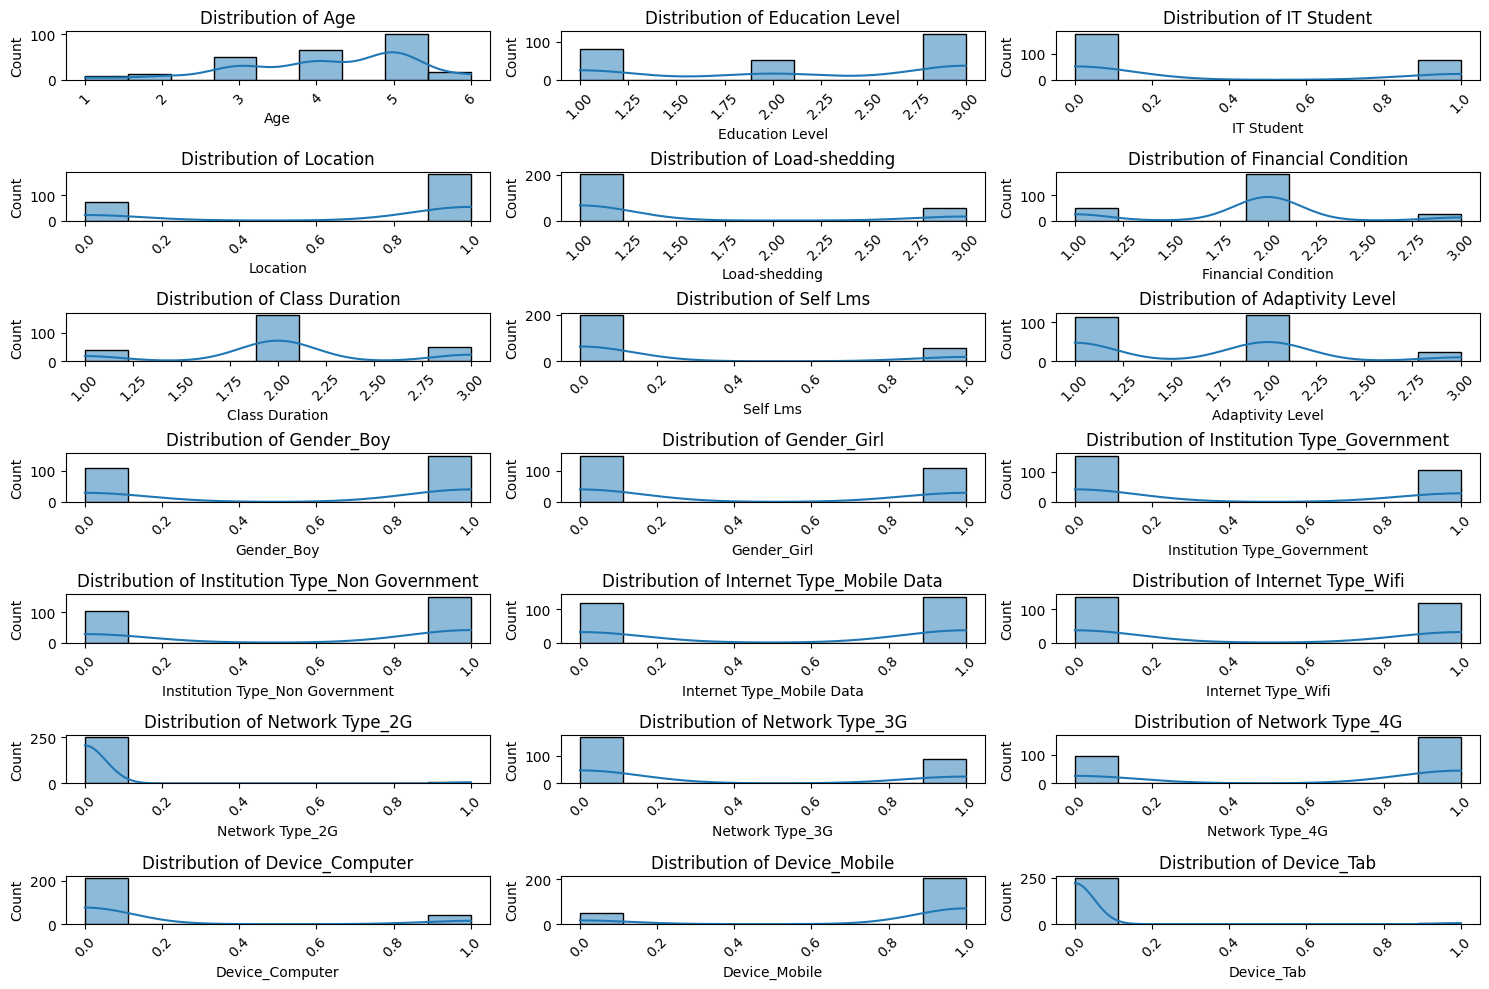

In [19]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

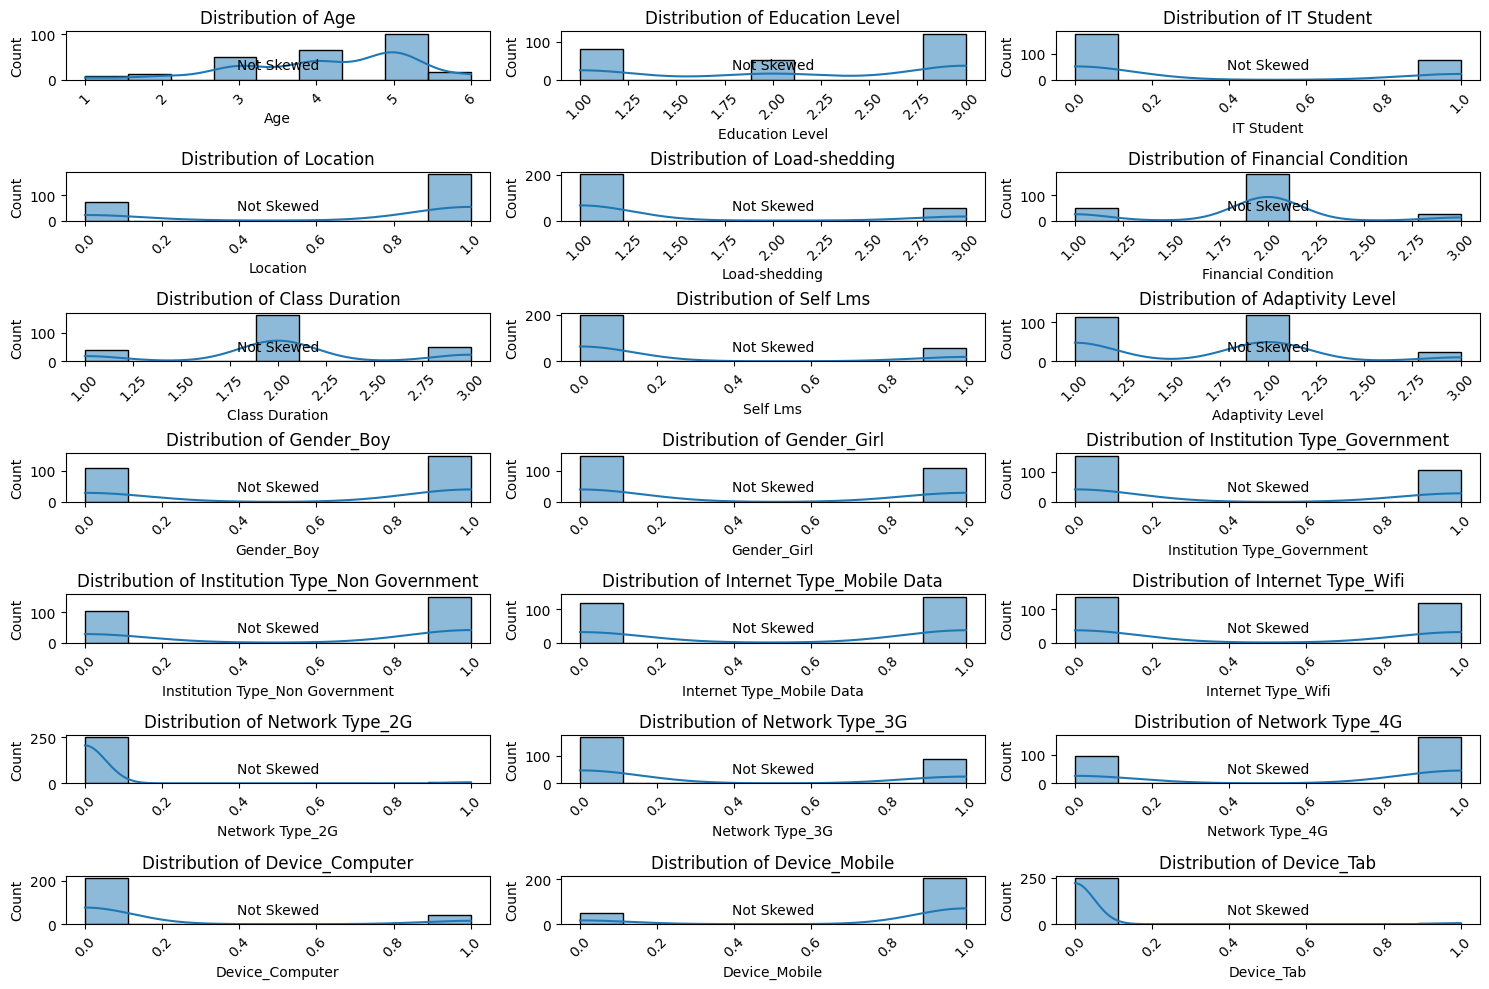

In [20]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

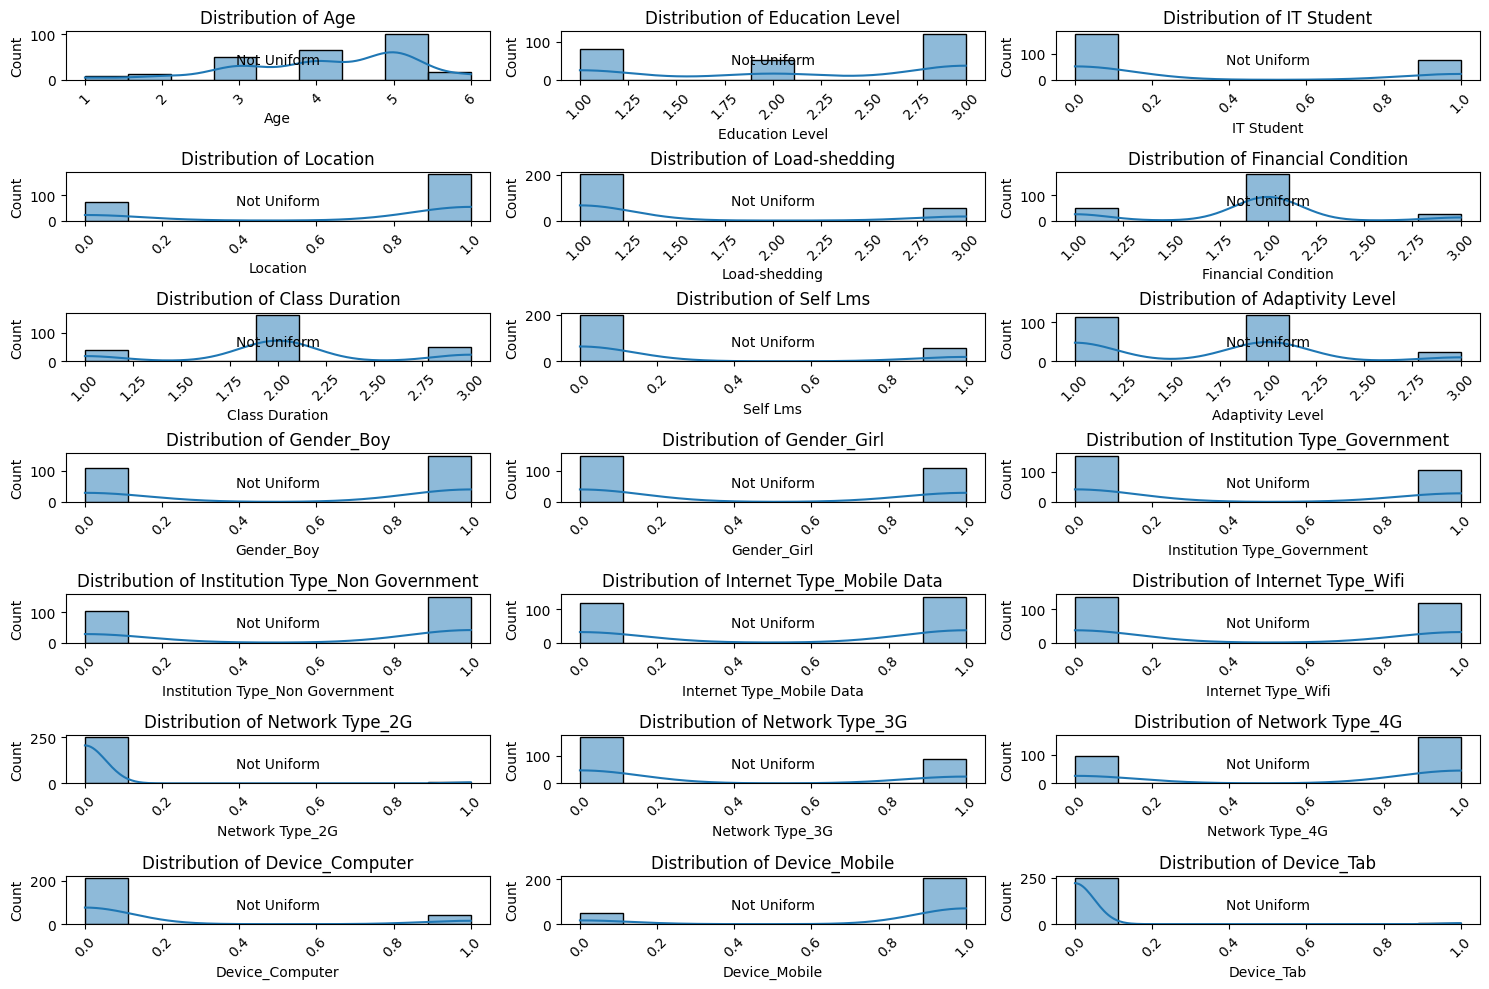

In [21]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for uniform distribution
    min_val = data[column].min()
    max_val = data[column].max()
    if max_val - min_val < 1e-6:
        plt.text(0.5, 0.4, "Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.4, "Not Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [22]:
X = data.drop( 'Adaptivity Level', axis=1)
y = data[ 'Adaptivity Level']


### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Train Test Split

In [24]:
# Normalize the features
min_max_scaler = MinMaxScaler()

In [25]:
min_max_scaler.fit(X)

MinMaxScaler()

In [26]:
scaled_features = min_max_scaler.transform(X)
scaled_features

array([[0.8, 1. , 0. , ..., 0. , 0. , 1. ],
       [0.8, 1. , 0. , ..., 0. , 1. , 0. ],
       [0.6, 0.5, 0. , ..., 0. , 1. , 0. ],
       ...,
       [nan, nan, nan, ..., 0. , 1. , 0. ],
       [nan, nan, nan, ..., 0. , 1. , 0. ],
       [nan, nan, nan, ..., 1. , 0. , 0. ]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train,y_train)

NameError: name 'X_train' is not defined

#### Check different distance metric

**Euclidean**

**Manhattan**

# Decision Tree

**Using Entropy**

**Use Gini Index**

# All the Best!